In [1]:
# import the necessary packages
from imutils.face_utils import FaceAligner
from imutils.face_utils import rect_to_bb
from skimage.io import imread

import argparse
import imutils
import dlib
import sys
import cv2

import matplotlib.pyplot as plt
import uuid

In [2]:
# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()

ap.add_argument("-p", "--shape-predictor", required=False,help="path to facial landmark predictor")

ap.add_argument("-i", "--image", required=False,help="path to input image")

args = vars(ap.parse_args('-i image -p shape-predictor'.split()))

In [3]:
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor and the face aligner
detector = dlib.get_frontal_face_detector()
# predictor = dlib.shape_predictor(args["shape_predictor"])
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
fa = FaceAligner(predictor, desiredFaceWidth=128)

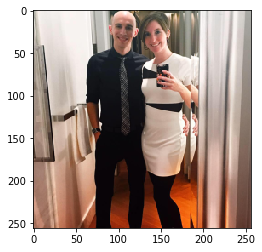

In [5]:
# load and show the original input image 
img_path = '/jupyteruser/11332722/other/face_align/face-alignment/images/'
img = 'example_01.jpg'


image = imread(img_path + img)

image = imutils.resize(image, width=256, height = 256)

plt.imshow(image);

In [6]:
#detect faces in the grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
dlib.get_frontal_face_detector()
rects = detector(gray, 2)

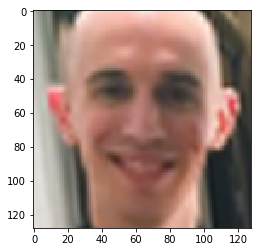

In [9]:
# loop over the face detections
for rect in rects:
    # extract the ROI of the *original* face, then align the face
    # using facial landmarks
    (x, y, w, h) = rect_to_bb(rect)
    faceOrig = imutils.resize(image[y:y + h, x:x + w], width=256)
    faceAligned = fa.align(image, gray, rect)

    f = str(uuid.uuid4())
    cv2.imwrite("foo/" + f + ".png", faceAligned)

    # display the output images
    plt.imshow(faceAligned)

In [ ]:
#ignore below....

In [ ]:

import dlib

detector = dlib.get_frontal_face_detector()
win = dlib.image_window()

for f in sys.argv[1:]:
    print("Processing file: {}".format(f))
    img = dlib.load_rgb_image(f)
    # The 1 in the second argument indicates that we should upsample the image
    # 1 time.  This will make everything bigger and allow us to detect more
    # faces.
    dets = detector(img, 1)
    print("Number of faces detected: {}".format(len(dets)))
    for i, d in enumerate(dets):
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            i, d.left(), d.top(), d.right(), d.bottom()))

    win.clear_overlay()
    win.set_image(img)
    win.add_overlay(dets)
    dlib.hit_enter_to_continue()


# Finally, if you really want to you can ask the detector to tell you the score
# for each detection.  The score is bigger for more confident detections.
# The third argument to run is an optional adjustment to the detection threshold,
# where a negative value will return more detections and a positive value fewer.
# Also, the idx tells you which of the face sub-detectors matched.  This can be
# used to broadly identify faces in different orientations.
if (len(sys.argv[1:]) > 0):
    img = dlib.load_rgb_image(sys.argv[1])
    dets, scores, idx = detector.run(img, 1, -1)
    for i, d in enumerate(dets):
        print("Detection {}, score: {}, face_type:{}".format(
            d, scores[i], idx[i]))